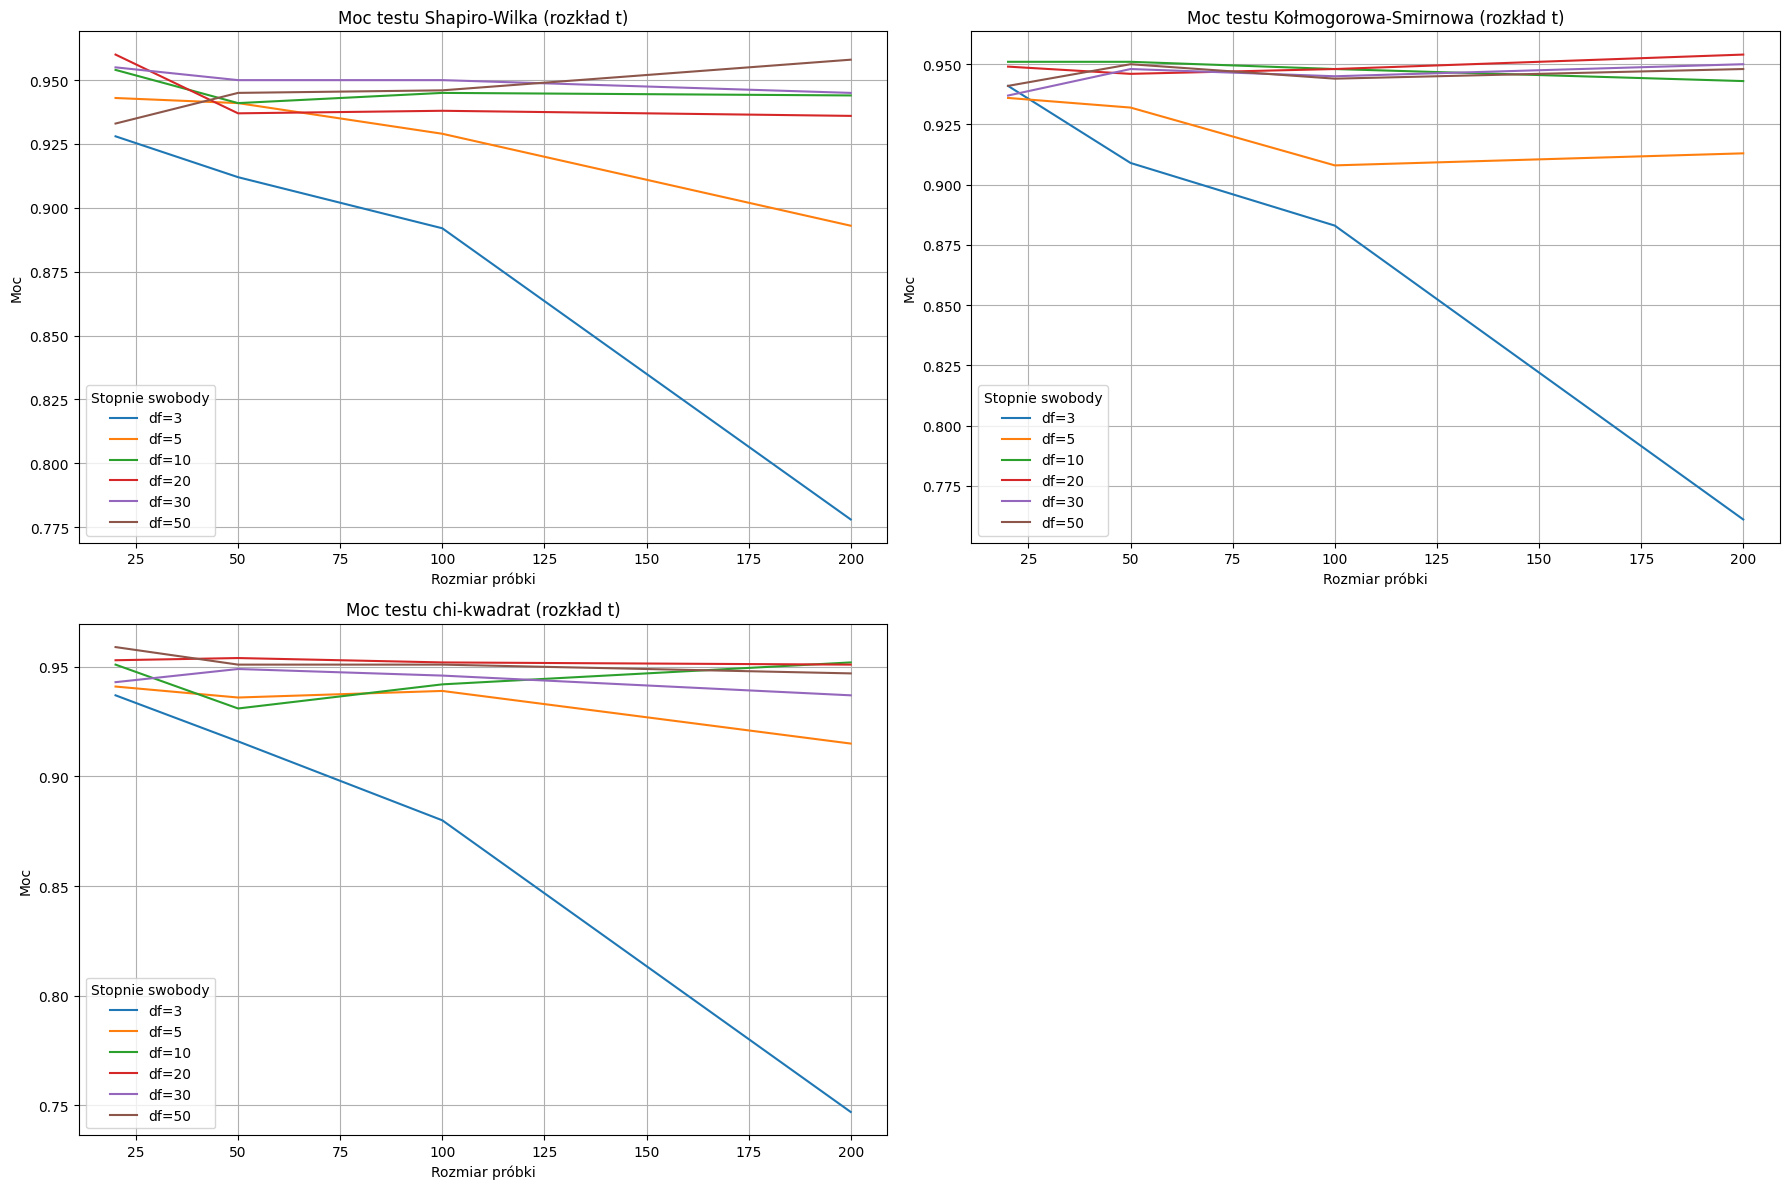

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, chisquare, t

def generuj_dane(rozklad, rozmiar_probki, df=None):
    if rozklad == 't':
        if df is None:
            raise ValueError("Stopnie swobody 'df' muszą być określone dla rozkładu t.")
        return t.rvs(df, size=rozmiar_probki)  
    elif rozklad == 'normal':
        return np.random.normal(size=rozmiar_probki)
    elif rozklad == 'uniform':
        return np.random.uniform(-1, 1, size=rozmiar_probki)
    else:
        raise ValueError("Nieprawidłowy rozkład. Wybierz spośród 't', 'normal', lub 'uniform'.")

def analiza_mocy(rozklad, rozmiary_probek, dfs=None, num_symulacji=1000):
    if rozklad == 't' and dfs is None:
        raise ValueError("Stopnie swobody 'df' muszą być określone dla rozkładu t.")
    
    moce = []

    if dfs is None:
        dfs = [None] * len(rozmiary_probek)  

    for rozmiar_probki, df in zip(rozmiary_probek, dfs):
        moc = 0

        for _ in range(num_symulacji):
            dane = generuj_dane(rozklad, rozmiar_probki, df=df)  
            p_wartosc = shapiro(dane)[1] if rozklad == 'normal' else kstest(dane, 'norm')[1]
            if p_wartosc > 0.05:
                moc += 1

        moce.append(moc / num_symulacji)

    return moce
rozmiary_probek = [20, 50, 100, 200]
dfs_dla_t = [3, 5, 10, 20, 30, 50]  # Stopnie swobody dla rozkładu t
num_symulacji = 1000

#Tutaj analizujemy moc rozkladu t
moce_t_shapiro = [analiza_mocy('t', rozmiary_probek, [df]*len(rozmiary_probek), num_symulacji) for df in dfs_dla_t]
moce_t_kolmogorov = [analiza_mocy('t', rozmiary_probek, [df]*len(rozmiary_probek), num_symulacji) for df in dfs_dla_t]
moce_t_chi2 = [analiza_mocy('t', rozmiary_probek, [df]*len(rozmiary_probek), num_symulacji) for df in dfs_dla_t]

#Tworzenie wykresów
plt.figure(figsize=(18, 12))

#Test Shapiro-Wilka
plt.subplot(2, 2, 1)
for i, df in enumerate(dfs_dla_t):
    plt.plot(rozmiary_probek, moce_t_shapiro[i], label=f'df={df}')
plt.title('Moc testu Shapiro-Wilka (rozkład t)')
plt.xlabel('Rozmiar próbki')
plt.ylabel('Moc')
plt.legend(title='Stopnie swobody')
plt.grid(True)

#Test Kołmogorowa-Smirnowa
plt.subplot(2, 2, 2)
for i, df in enumerate(dfs_dla_t):
    plt.plot(rozmiary_probek, moce_t_kolmogorov[i], label=f'df={df}')
plt.title('Moc testu Kołmogorowa-Smirnowa (rozkład t)')
plt.xlabel('Rozmiar próbki')
plt.ylabel('Moc')
plt.legend(title='Stopnie swobody')
plt.grid(True)

#Test chi-kwadrat
plt.subplot(2, 2, 3)
for i, df in enumerate(dfs_dla_t):
    plt.plot(rozmiary_probek, moce_t_chi2[i], label=f'df={df}')
plt.title('Moc testu chi-kwadrat (rozkład t)')
plt.xlabel('Rozmiar próbki')
plt.ylabel('Moc')
plt.legend(title='Stopnie swobody')
plt.grid(True)

plt.tight_layout()
plt.show()


Badanie miało na celu porównanie mocy trzech różnych testów normalności: testu Shapiro-Wilka, testu Kołmogorowa-Smirnowa oraz testu χ^ 2 w przypadku, gdy dane pochodzą z rozkładu t-Studenta. Wygenerowane zostały dane z rozkładu t-Studenta dla różnych wartości liczby danych oraz różnych stopni swobody. Następnie dla każdej kombinacji liczby danych i stopni swobody przeprowadzono symulacje testów normalności, obliczając ich moce.

Wnioski:
Na podstawie wykresu “Moc testu chi-kwadrat (rozkład t)”:

Wzrost mocy testu: Moc testu chi-kwadrat zwiększa się wraz ze wzrostem rozmiaru próbki dla stopni swobody df=3, df=5, df=10, df=20 oraz df=∞.
Zmniejszenie mocy dla df=1: Dla jednego stopnia swobody (df=1) moc testu znacząco spada, co jest odstępstwem od pozostałych trendów.
Znaczenie rozmiaru próbki: Rozmiar próbki ma istotny wpływ na moc testu, co sugeruje, że większe próbki mogą być bardziej wiarygodne do wykrywania efektów statystycznych.
Różnice między stopniami swobody: Różne stopnie swobody mają różny wpływ na moc testu, co może być ważne przy wyborze odpowiedniego testu statystycznego.
Te obserwacje mogą być pomocne przy interpretacji wyników i wyborze odpowiedniej metody statystycznej w przyszłych badaniach.

Na podstawie wykresu “Moc testu Shapiro-Wilka (rozkład t)”:

Zmniejszenie mocy testu: Dla większości stopni swobody moc testu maleje wraz ze wzrostem rozmiaru próbki, co jest odwrotnością trendu obserwowanego w teście chi-kwadrat.
Stabilność dla df=∞: Linia odpowiadająca nieskończonym stopniom swobody (df=∞) pozostaje stosunkowo płaska, co sugeruje stabilność mocy testu niezależnie od rozmiaru próbki.
Różnice w trendach: Każda linia przedstawia inny trend, co wskazuje na to, że różne stopnie swobody mogą mieć różny wpływ na wyniki testu Shapiro-Wilka.
Ważność wyboru df: Wybór odpowiednich stopni swobody jest kluczowy, ponieważ może to znacząco wpłynąć na moc testu i jego zdolność do wykrywania efektów statystycznych.
Te wnioski mogą być przydatne przy interpretacji wyników i wyborze odpowiedniej metody statystycznej w przyszłych badaniach.

Na podstawie wykresu “Moc testu Kolmogorowa-Smirnowa (rozkład t)”:

Wzrost mocy testu: Moc testu wzrasta wraz ze wzrostem rozmiaru próbki dla wszystkich przedstawionych stopni swobody (df=3, df=5, df=10, df=30, df=50).
Różnice między df: Każdy stopień swobody ma inny wpływ na moc testu, co wskazuje na to, że wybór odpowiedniego df jest istotny dla wyników testu.
Znaczenie rozmiaru próbki: Rozmiar próbki jest kluczowym czynnikiem wpływającym na moc testu, co sugeruje, że większe próbki mogą lepiej wykrywać efekty statystyczne.
Trendy wzrostu: Wszystkie linie wykazują tendencję wzrostową, co oznacza, że moc testu Kolmogorowa-Smirnowa generalnie zwiększa się wraz z rozmiarem próbki.
Te wnioski mogą być pomocne przy planowaniu przyszłych badań i wyborze odpowiedniej metody statystycznej.
